## Observations and Insights 

In [116]:
print("1.    Of the four drug regimens analysed in the 'Average Tumour Volume (mm3) for Four Drug Regimens' box plot Capomulin and Ramicane appear to have the lowest average tumour size (this relationship may not be causal however)")
print("2.    The r-squared value of  approximately 0.71 indicates a strong correlation between mouse weight and average tumour volume in mice being treated with Capomulin")
print("3.    The drug regimens Ketapril, Naftisol and Stelasyn have higher average tumour volumes than placebo indicating that these drugs are probably not efficacious")

1.    Of the four drug regimens analysed in the 'Average Tumour Volume (mm3) for Four Drug Regimens' box plot Capomulin and Ramicane appear to have the lowest average tumour size (this relationship may not be causal however)
2.    The r-squared value of  approximately 0.71 indicates a strong correlation between mouse weight and average tumour volume in mice being treated with Capomulin
3.    The drug regimens Ketapril, Naftisol and Stelasyn have higher average tumour volumes than placebo indicating that these drugs are probably not efficacious


In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = mouse_metadata.merge(study_results, how = "outer", on = "Mouse ID", left_index = False, right_index = True)
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
0,k403,Ramicane,Male,21,16,5,38.825898,0
0,k403,Ramicane,Male,21,16,10,35.014271,1
0,k403,Ramicane,Male,21,16,15,34.223992,1
0,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Checking the number of mice.
len(set(df["Mouse ID"]))

249

In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
ID = list(df["Mouse ID"][df.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False) == True])
ID

['g989',
 'g989',
 'g989',
 'g989',
 'g989',
 'g989',
 'g989',
 'g989',
 'g989',
 'g989']

In [40]:
# Optional: Get all the data for the duplicate mouse ID. 


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for item in ID:
    clean_df = df[df["Mouse ID"] != item]

In [42]:
# Checking the number of mice in the clean DataFrame.
len(set(clean_df["Mouse ID"]))


248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
SD = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
SEM = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
median = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({"Mean" : mean,
                          "Median" : median,
                          "Variance" : variance,
                          "Standard Deviation" : SD,
                          "SEM" : SEM
                          })
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_group = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']})
summary_group
# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

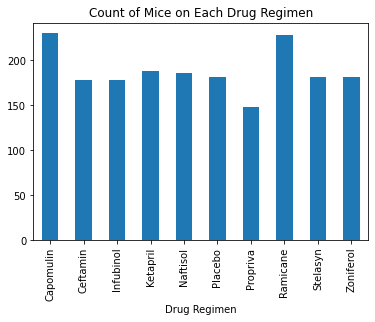

In [66]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
counted_df = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
counted_df.plot.bar(y = "Mouse ID", title = "Count of Mice on Each Drug Regimen")


Text(0.5, 1.0, 'Count of Mice on Each Drug Regimen')

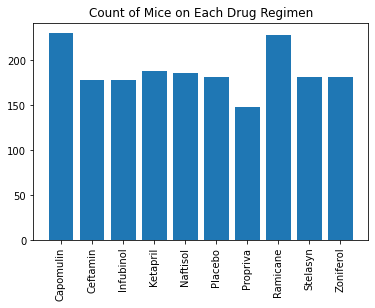

In [69]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y_values = (clean_df.groupby("Drug Regimen")["Mouse ID"].count().reset_index())["Mouse ID"].tolist()
x_values = sorted(list(set(clean_df["Drug Regimen"])))
bar = plt.bar(x_values, y_values)
plt.xticks(rotation = 90)
plt.title("Count of Mice on Each Drug Regimen")

C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, '')

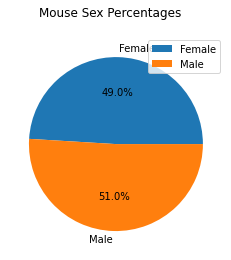

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counted_df = clean_df.groupby("Sex")["Mouse ID"].count().reset_index().set_index("Sex")
counted_df.plot.pie(subplots = True, autopct="%1.1f%%", title ="Mouse Sex Percentages")
plt.axes().set_ylabel('')

Text(0.5, 1.0, 'Mouse Sex Percentages')

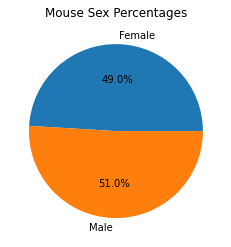

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = (clean_df.groupby("Sex")["Mouse ID"].count().reset_index())["Mouse ID"].tolist()
labels = (clean_df.groupby("Sex")["Mouse ID"].count().reset_index())["Sex"].tolist()
plt.pie(sizes, labels = labels, autopct="%1.1f%%")
plt.title("Mouse Sex Percentages")

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_df = pd.DataFrame({"Timepoint" : max_timepoint}).reset_index()
max_timepoint_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumour_volume_df = pd.merge(max_timepoint, clean_df, on = ["Mouse ID", "Timepoint"], how = "inner")
tumour_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [78]:
# Create new DataFrame with only tumour volume data for relevant drug regimens
   
Capomulin_df = tumour_volume_df[tumour_volume_df["Drug Regimen"] == "Capomulin"].reset_index()
Capomulin_df = Capomulin_df["Tumor Volume (mm3)"]

Ceftamin_df = tumour_volume_df[tumour_volume_df["Drug Regimen"] == "Ceftamin"].reset_index()
Ceftamin_df = Ceftamin_df["Tumor Volume (mm3)"]

Infubinol_df = tumour_volume_df[tumour_volume_df["Drug Regimen"] == "Infubinol"].reset_index()
Infubinol_df = Infubinol_df["Tumor Volume (mm3)"]

Ramicane_df = tumour_volume_df[tumour_volume_df["Drug Regimen"] == "Ramicane"].reset_index()
Ramicane_df = Ramicane_df["Tumor Volume (mm3)"]

new_df = pd.DataFrame({"Capomulin" : Capomulin_df,
                          "Ceftamin" : Ceftamin_df,
                          "Infubinol" : Infubinol_df,
                          "Ramicane" : Ramicane_df,
                          })

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

[q1, q2, q3]=Capomulin_df.quantile([0.25, 0.5, 0.75])
IQR = q3 - q1
Capomulin_outliers = Capomulin_df[Capomulin_df < q1 - 1.5*IQR]
Capomulin_df[Capomulin_df > q3 + 1.5*IQR]
print(Capomulin_outliers)

[q1, q2, q3]=Ceftamin_df.quantile([0.25, 0.5, 0.75])
IQR = q3 - q1
Ceftamin_outliers = Ceftamin_df[Ceftamin_df < q1 - 1.5*IQR]
Ceftamin_df[Ceftamin_df > q3 + 1.5*IQR]
print(Ceftamin_outliers)

[q1, q2, q3]=Infubinol_df.quantile([0.25, 0.5, 0.75])
IQR = q3 - q1
Infubinol_outliers = Infubinol_df[Infubinol_df < q1 - 1.5*IQR]
Infubinol_df[Infubinol_df > q3 + 1.5*IQR]
print(Infubinol_outliers)

[q1, q2, q3]=Ramicane_df.quantile([0.25, 0.5, 0.75])
IQR = q3 - q1
Ramicane_outliers = Ramicane_df[Ramicane_df < q1 - 1.5*IQR]
Ramicane_df[Ramicane_df > q3 + 1.5*IQR]
print(Ramicane_outliers)
print(f"There is one potential outlier identified in the Infubinol group with an average tumour volume of {Infubinol_df[5]}mm3")


Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)
There is one potential outlier identified in the Infubinol group with an average tumour volume of 36.321345799999996mm3


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'Average Tumour Volume (mm3) for Four Drug Regimens')

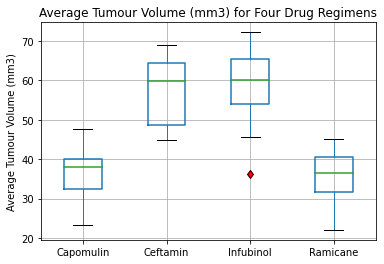

In [108]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#new_df.boxplot()
new_df.plot(kind = 'box',
       boxprops = dict(linewidth=1.5),
       medianprops = dict(linewidth=1.5),
        flierprops = dict(markerfacecolor = 'r', marker = 'd', linewidth =1.5),
           grid = True)
plt.axes().set_ylabel("Average Tumour Volume (mm3)")
plt.title("Average Tumour Volume (mm3) for Four Drug Regimens")

## Line and Scatter Plots

C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Tumour Volume (mm3) of Mouse s185 Across Experimental Timepoints')

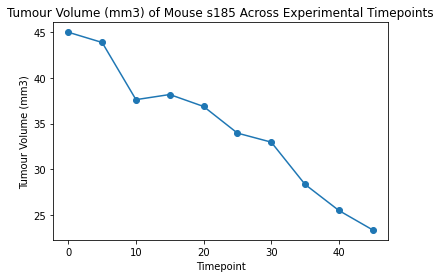

In [107]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_df = clean_df[clean_df["Mouse ID"] == "s185"].reset_index()
timepoint = s185_df["Timepoint"].tolist()
tumour_volumes = s185_df["Tumor Volume (mm3)"].tolist()
plt.plot(timepoint, tumour_volumes, marker = "o")
plt.xlabel("Timepoint")
plt.axes().set_ylabel("Tumour Volume (mm3)")
plt.title("Tumour Volume (mm3) of Mouse s185 Across Experimental Timepoints")


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, ' Average Tumor Volume (mm3) in a Mouse Compared to its Weight (g)')

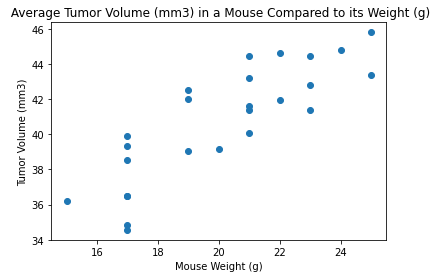

In [109]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df2 = clean_df[clean_df["Drug Regimen"] == "Capomulin"].reset_index()
mouse_weight = list(Capomulin_df2.groupby("Mouse ID")["Weight (g)"].mean())
tumour_volumes2 = list(Capomulin_df2.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())

plt.scatter(mouse_weight, tumour_volumes2)
plt.xlabel("Mouse Weight (g)")
plt.axes().set_ylabel("Tumor Volume (mm3)")
plt.title(" Average Tumor Volume (mm3) in a Mouse Compared to its Weight (g)")

## Correlation and Regression

The r-squared value is 0.71 this indicates a strong correlation between mouse weight and average tumour volume in mice being treated with Capomulin


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


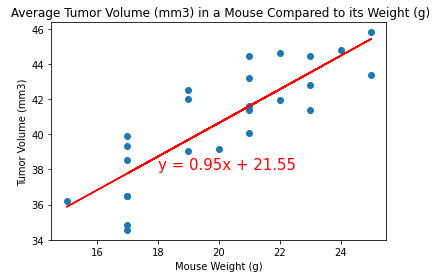

In [113]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, tumour_volumes2)
regress_values = pd.Series(mouse_weight) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(mouse_weight, regress_values, color = "r")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.scatter(mouse_weight, tumour_volumes2)
plt.xlabel("Mouse Weight (g)")
plt.axes().set_ylabel("Tumor Volume (mm3)")
plt.title(" Average Tumor Volume (mm3) in a Mouse Compared to its Weight (g)")

print(f"The r-squared value is {round(rvalue**2, 2)} this indicates a strong correlation between mouse weight and average tumour volume in mice being treated with Capomulin")